# Boston House Price Project

__About business Problem__ : Find out the price of House in Boston area

__Dataset Description__:
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's


Variable #14(MEDV) seems to be censored at 50.00 (corresponding to a median price of $50,000); Censoring is suggested by the fact that the highest median price of exactly $50,000 is reported in 16 cases, while 15 cases have prices between $40,000 and $50,000, with prices rounded to the nearest hundred. Harrison and Rubinfeld do not mention any censoring.

Dataset available at : http://lib.stat.cmu.edu/datasets/boston

Lets Start the problem:
1.Import the require libraries, generally basic library like numpy, pandas, matplotlib, scipy are used also as it is regression problem , we will used scikit learn for modelling and tunning.

In [140]:
#Import Libraries

#basic python libraries
import os
import warnings

#Basic Analysis libraries
import pandas as pd
import numpy as np
import scipy

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit learn library for processing and modelling
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

#Ensembles from scikit learn
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [141]:
# With ignore we can avoid warnings generated during execution
warnings.filterwarnings("ignore")

 __Explodatory data analysis :__
 
 __Observations__:
  1. As in dataset, bydefault columns name are not mentioned so we will create list of columns name given with description
  2. This dataset is already loaded in my home directory so I can directly load it using Pandas.
  3. To take a feel of dataset , I display first 10 columns but with that I didnt get any idea.
  4. In dataset , 14 columns and 506 rows are present
  5. All dataset is of float as I have already converted it.
  6. Dataset didnt contain null value or any missing data point
  7. Description gives me hint about what is min max value and how data is spread also the range of data from other columns 
  


In [142]:
#Import dataset from local disk
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']    
dataset=pd.read_csv("boston.csv",delim_whitespace=True,names=names)
dataset=dataset.astype('float')

In [143]:
#Display first 10 column of dataset
dataset.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
5     18.7  394.12   5.21  28.7  
6     15.2  395.60  12.43  22.9  
7     15.2  396.90  19.15  27.1  
8     15.2  386.63  29.93  16.5  
9     15.2  386.71  17.10  18.9

In [144]:
#shape of the dataset
dataset.shape

(506, 14)

In [145]:
#data type of Dataset
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [146]:
#dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [147]:
#description of Dataset
dataset.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

Lets understand dataset with visualization
Obervations:
1. From below histogram and density plot it observed that data is not symmetrically distrubuted
2. Also range for each attribute is differring
3. so we need to transform and preprocess the data

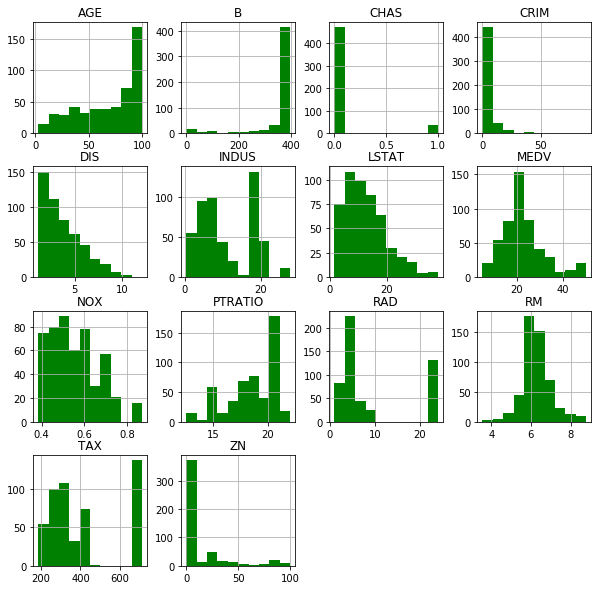

In [148]:
# Basic univariate visualization
#Understand dataset using histogram
dataset.hist(figsize=(10,10),color='g',bins=10)
plt.show()


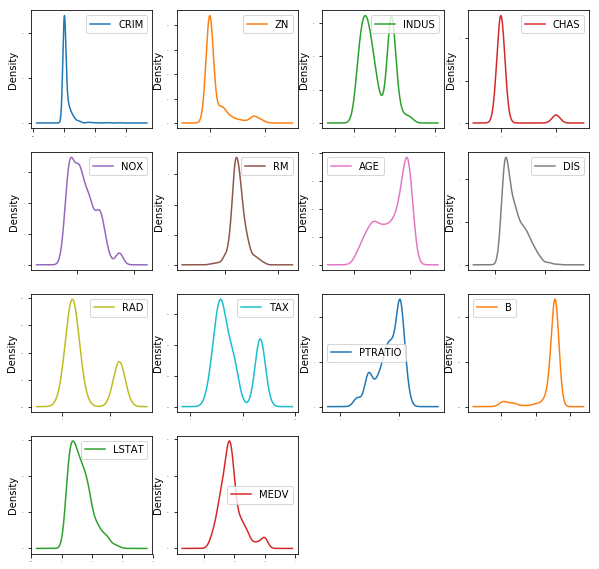

In [149]:
#Understand distribution of dataset using density plot
dataset.plot(kind='density',subplots=True,layout=(4,4),fontsize=1,figsize=(10,10),sharex=False,legend=True)
plt.show()

lets understnad data and its relation with each other with pairplot and heatmap
1. from heatmap we get fair adea about how the data is related to each other
2. most of the attributes has not strong relation with each other
3. Below pairplot showed, scattering of attribute showed some outliners, lets move ahead and try to understand its impact.

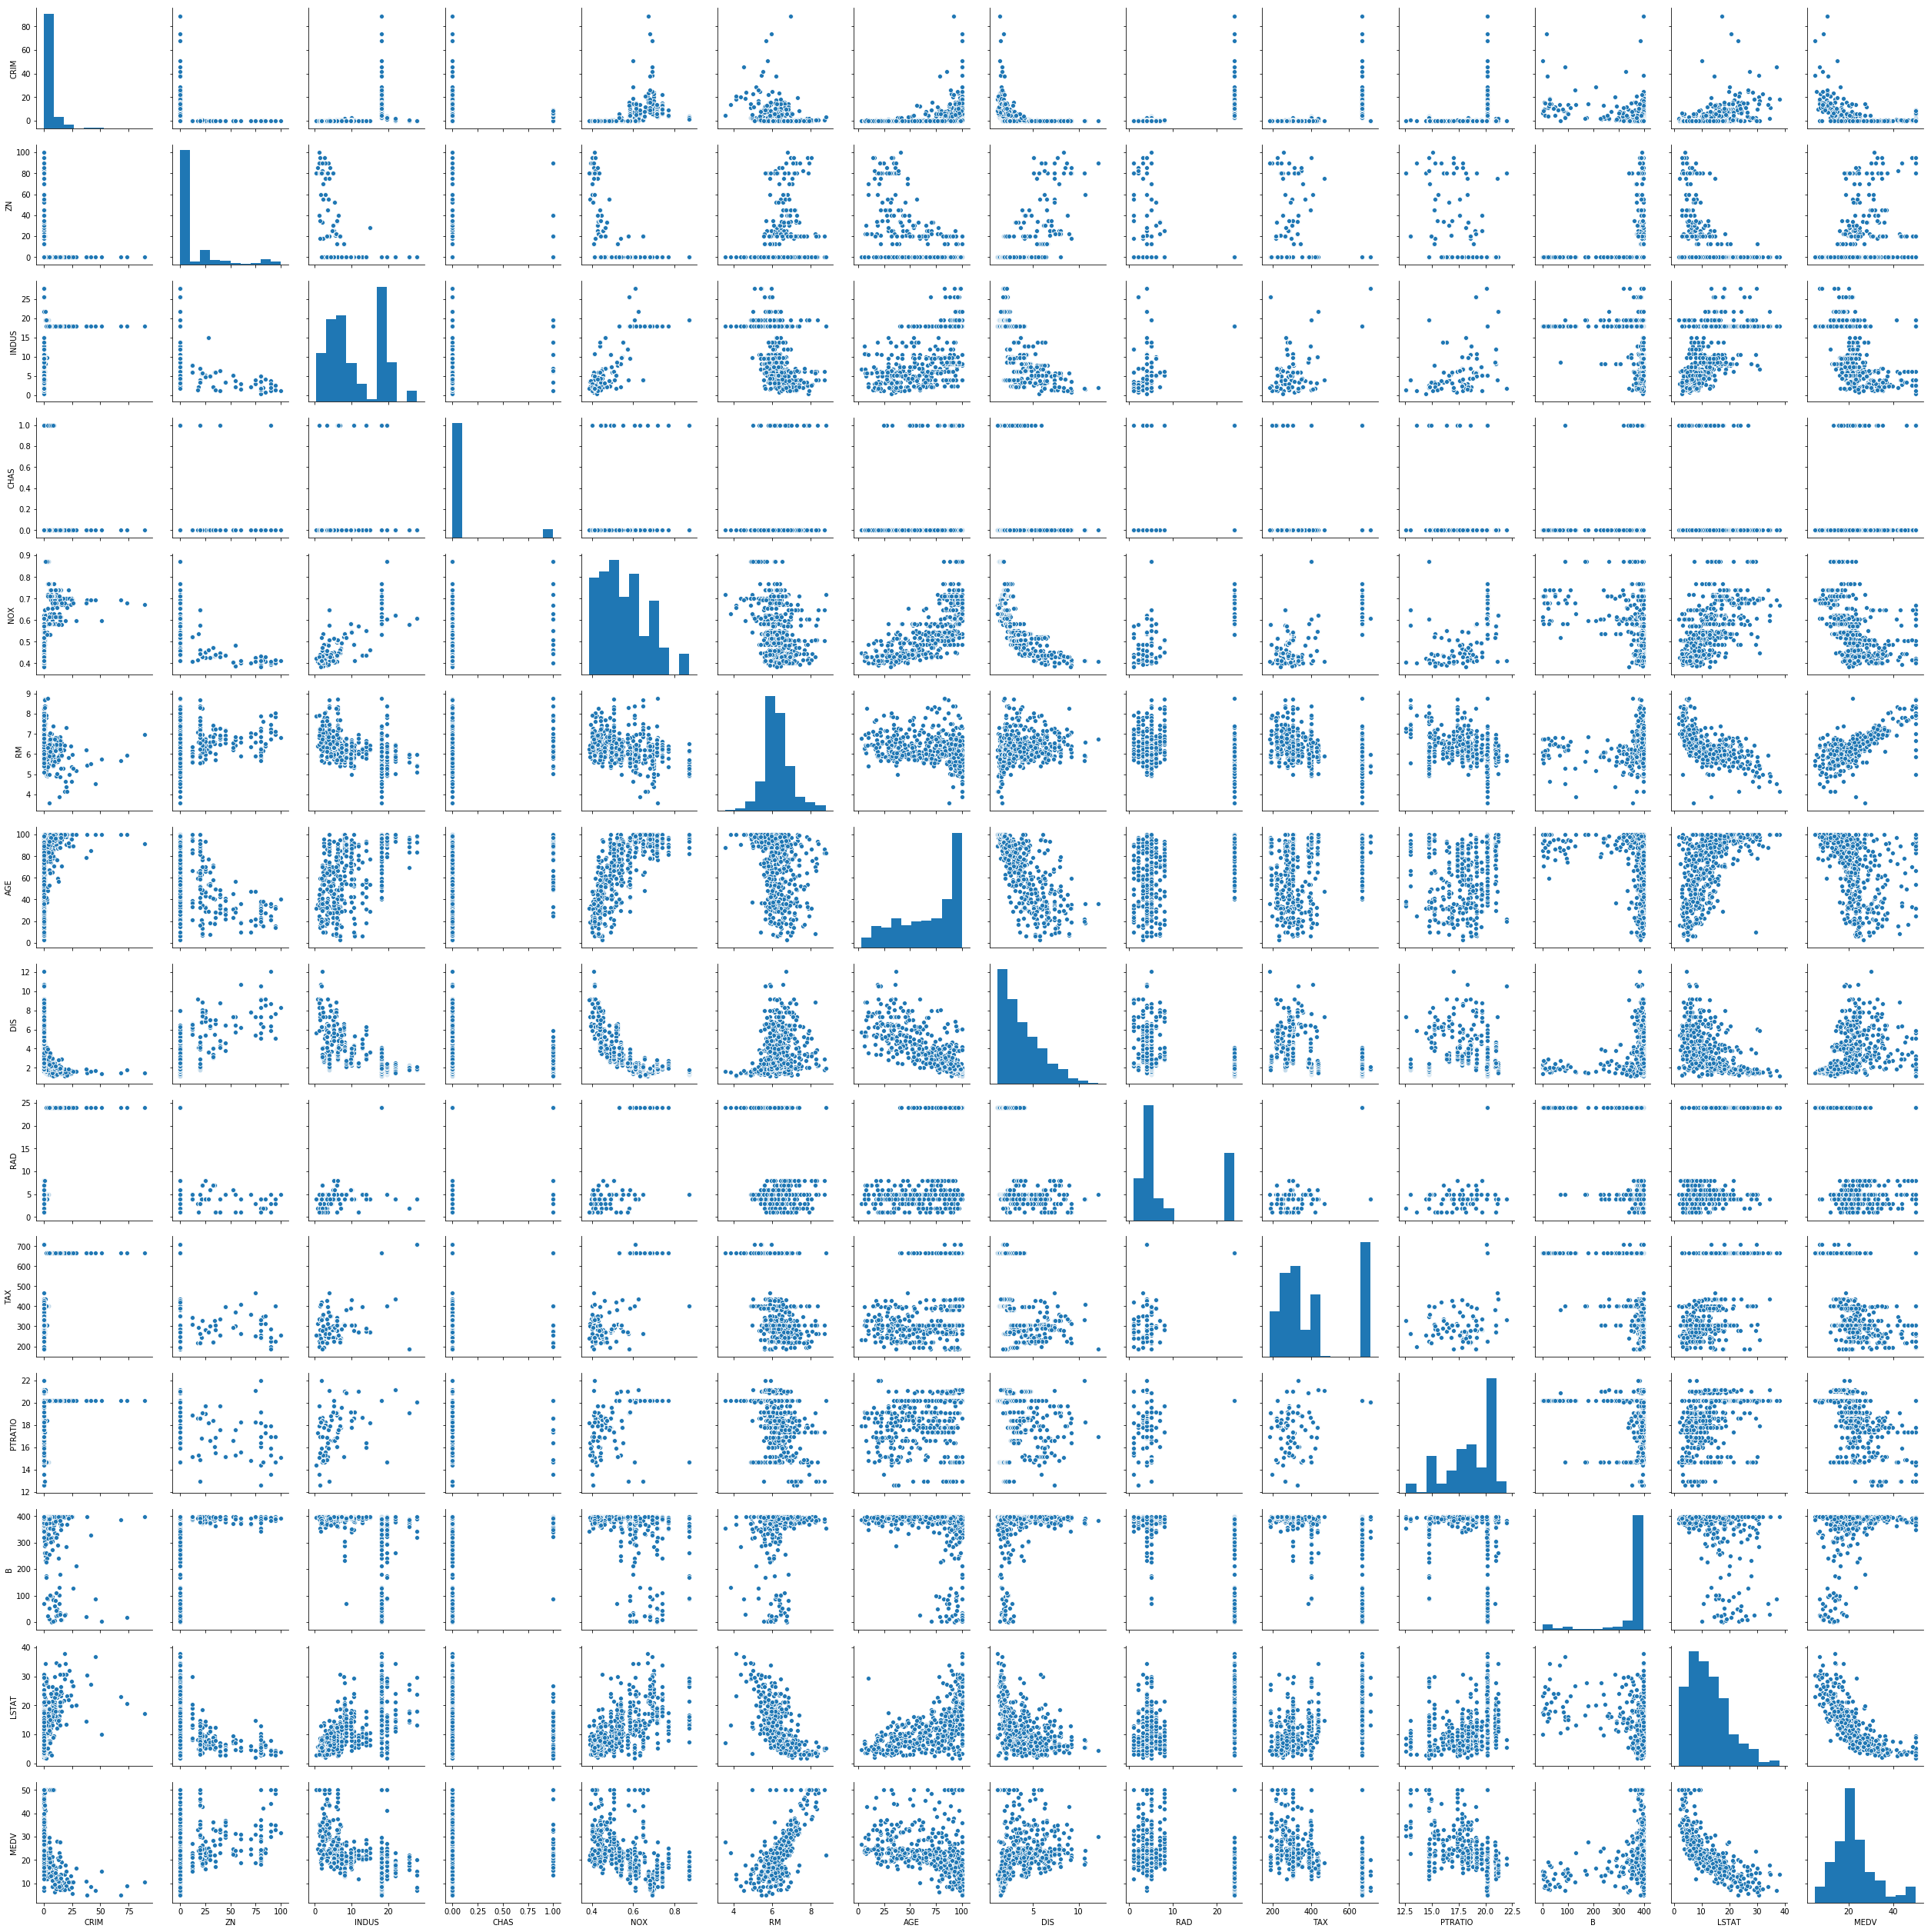

In [150]:
#pairplot
sns.pairplot(dataset)
plt.show()

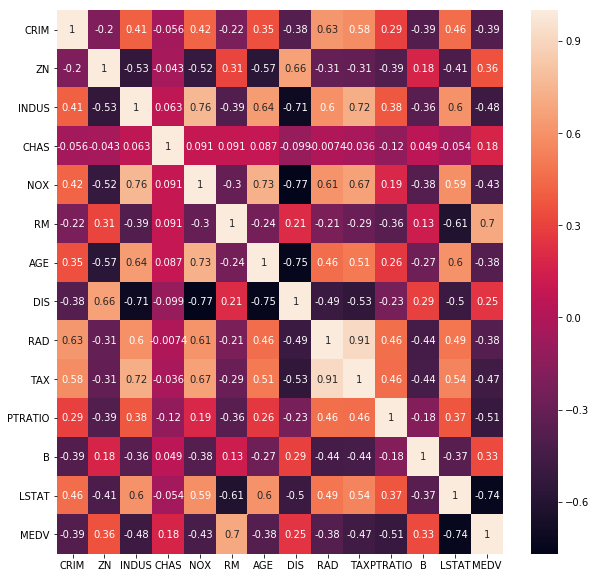

In [151]:
corrl=dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrl,annot=True)
plt.show()

1. In earliar observation, we observe that we require to transform the data
2. lets find out its different with 2 observation , with transformation mean squared error, without trnasformation mean squared error.
3. below we will find out the skewness of each columns and set criteria that if skewness id greater than 0.75 then that column will get transfrom
4. from the results of skewnwwss 6 7 columns require transformation

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
[ 5.20765239  2.21906306  0.29414628  3.39579929  0.72714416  0.40241467
 -0.59718559  1.00877876  1.00183349  0.66796827 -0.79994453 -2.88179835
  0.90377074  1.10481082]


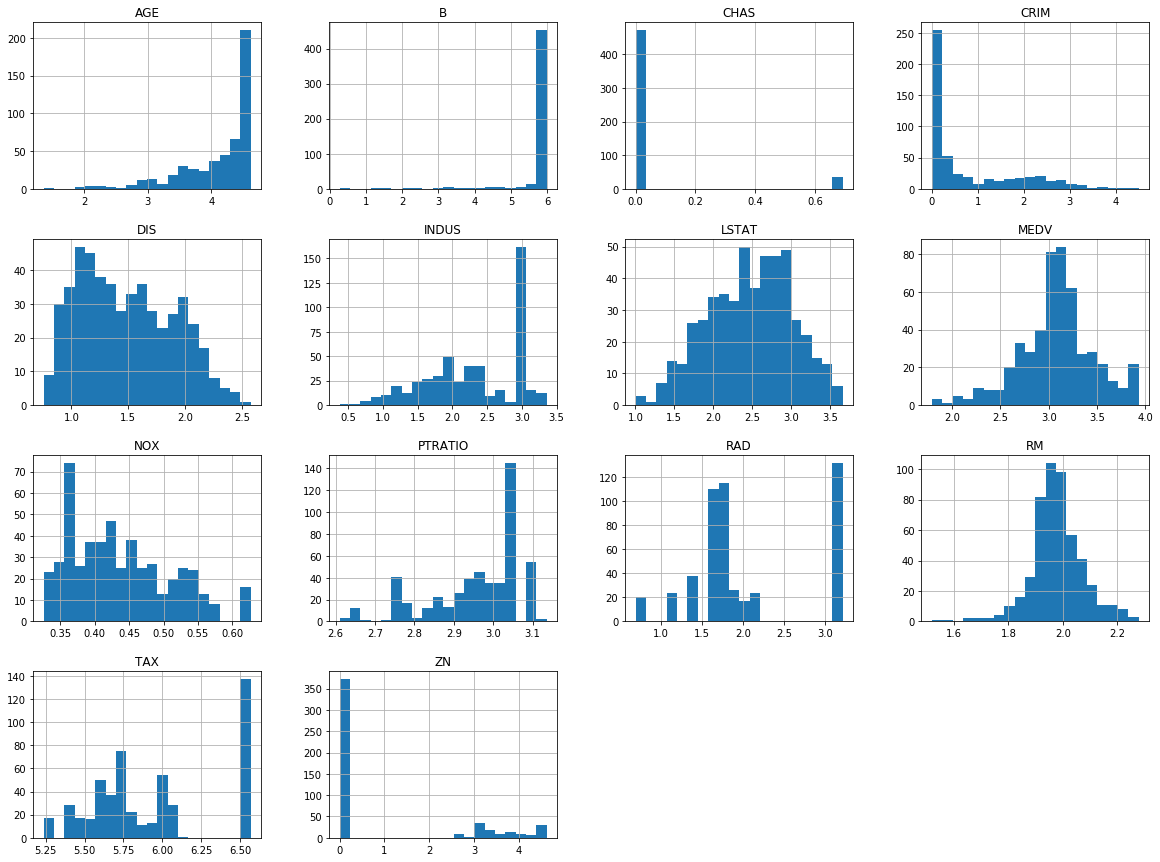

In [152]:
dt=dataset.copy()
col_number = dt.select_dtypes(include=['number']).columns.tolist()
print(col_number)
for col_transform in col_number:
    skewness = scipy.stats.skew(dt[col_number])
print(skewness)
if skewness.all() > 0.75 :
    dt[col_number] = np.log1p(dt[col_number])
        
dt.hist(bins=20, figsize=(20, 15))
plt.show()

In [153]:
# Select columns of the dataset and target 
array=dt.values
X=array[:,0:13]
Y=array[:,13]

In [154]:
#split dataset for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=10)

1. After splitting the dataset , Now lets build the model
2. right now we dont know ,which ML algorithm will best suites for this regression
3. Lets try to figure out bydefault which algorithm gives minimum mean squared error

Observations:
1. from the below result,SVR algorithm gives best resuts and it dont contain any outliners in results

In [155]:
#spot check Algorithm
mllist=[]
mllist.append(('LR',LinearRegression()))
mllist.append(('LASSO',Lasso()))
mllist.append(('EN',ElasticNet()))
mllist.append(('KNN',KNeighborsRegressor()))
mllist.append(('CART',DecisionTreeRegressor()))
mllist.append(('SVR',SVR()))
#mllist.append(('NB',GaussianNB()))

LR -0.03393002252925348 0.016439264893397556
LASSO -0.1463316749584664 0.04391893230804743
EN -0.1463316749584664 0.04391893230804743
KNN -0.037153685989505525 0.014991290551166485
CART -0.05041799283979296 0.022085909692224504
SVR -0.029932143212616148 0.016501557725911574


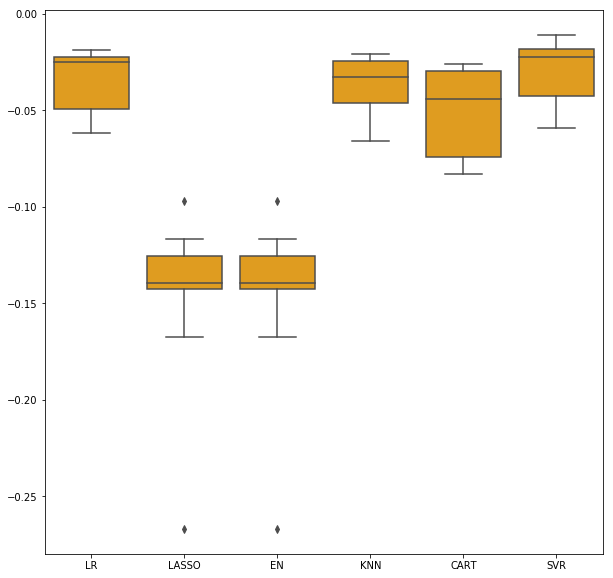

In [156]:
#evaluate each module in turn
names=[]
score=[]
scoring='neg_mean_squared_error'
for name,model in mllist:
    kfolds=KFold(n_splits=10,random_state=7,)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfolds,scoring=scoring)
    score.append(cv_results)
    names.append(name)
    print(name, cv_results.mean() ,cv_results.std())
    
plt.figure(figsize=(10,10))    
sns.boxplot(x=names,y=score,color="orange")
plt.show()

1. Earlier by default SVR gives the best results, Now lets preprocess the data and them apply ML algorithm and find out the best algorithms
2. after preprocessing the data, there is not much change in the result and SVR gives best results

In [157]:
#evaluate algorithm with Preprocessing data

pipe=[]
names1=[]
score1=[]
pipe.append(('scaledLR',Pipeline([('scaler',StandardScaler()),('LR',LinearRegression())])))
pipe.append(('scaledLasso',Pipeline([('scaler',StandardScaler()),('Lasso',Lasso())])))
pipe.append(('scaledElast',Pipeline([('scaler',StandardScaler()),('Elast',ElasticNet())])))
pipe.append(('scaledKNN',Pipeline([('scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipe.append(('scaledCART',Pipeline([('scaler',StandardScaler()),('CART',DecisionTreeRegressor())])))
pipe.append(('scaledSVR',Pipeline([('scaler',StandardScaler()),('SVR',SVR())])))

scoring='neg_mean_squared_error'
for name,model in pipe:
    kfolds=KFold(n_splits=10,random_state=7,)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfolds,scoring=scoring)
    score1.append(cv_results)
    names1.append(name)
    print(name, cv_results.mean() ,cv_results.std())


plt.figure(figsize=(10,10))    
sns.boxplot(x=names1,y=score1,color="orange")
plt.show()

scaledLR -0.03393002252925349 0.016439264893397473
scaledLasso -0.1463316749584664 0.04391893230804743
scaledElast -0.1463316749584664 0.04391893230804743
scaledKNN -0.03318728279198809 0.016283394788185357
scaledCART -0.05290717358272451 0.021375272282603764
scaledSVR -0.022975742925721254 0.013146381183931221


1. Before deciding the best algorithm best on above results , lets take a round of execution with Ensembles
2. with pipeline , preprocessing and Ensembles , we get output that Gradient boosting is giving better results than SVR
3. So in next step we will tune  Gradient boosting algorithm for hyper parameter tunning


In [158]:
#Trying Esembles 
pipeEse=[]
pipeEse.append(('ScaledAdaB',Pipeline([('Scaler',StandardScaler()),('AdaB',AdaBoostRegressor())])))
pipeEse.append(('ScaledGB',Pipeline([('Scaler',StandardScaler()),('GB',GradientBoostingRegressor())])))
pipeEse.append(('ScaledRFR',Pipeline([('Scaler',StandardScaler()),('RFR',RandomForestRegressor())])))
pipeEse.append(('ScaledETR',Pipeline([('Scaler',StandardScaler()),('ETR',ExtraTreesRegressor())])))

names=[]
result=[]
for name,model in pipeEse:
    kfolds=KFold(n_splits=10,random_state=7,)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfolds,scoring=scoring)
    result.append(cv_results)
    names.append(name)
    print(name, cv_results.mean() ,cv_results.std())


plt.figure(figsize=(10,10))    
sns.boxplot(x=names,y=result,color="orange")
plt.show()

ScaledAdaB -0.03065307088758217 0.01086547080863644
ScaledGB -0.02030608501897957 0.008337844455090898
ScaledRFR -0.027714096500797362 0.01120935131581355
ScaledETR -0.021966995722650328 0.008728757427784919


1. With Hyper parameter tunning with Gradient boosting algorithm we found that parameter with estimater=150 gave the best results
2. So lets create our model of regression with Gradient boosting algorithm with estimaters= 150

In [159]:
#tuning the Esembles for GradientBoosting

scaler=StandardScaler().fit(X_train)
trans=scaler.transform(X_train)
param_grid=dict(n_estimators=np.array([10,20,50,10,150,200,250,300,350,400,450,500]))
model=GradientBoostingRegressor(random_state=7)
kfolds=KFold(n_splits=10,random_state=7,)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(trans,Y_train)
print(grid_result.best_score_,grid_result.best_params_)


-0.019911850204751915 {'n_estimators': 150}


In [164]:
#MOdel finalization
scale=StandardScaler().fit(X_train)
tans1=scale.transform(X_train)

model=GradientBoostingRegressor(random_state=7,n_estimators=150)
model.fit(tans1,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [161]:
#Test the final model
tran2=scale.transform(X_test)
predict1=model.predict(tran2)
print(mean_squared_error(Y_test,predict1))
#print(performance_metric(Y_test,predict1))
print(r2_score(Y_test,predict1)*100)



0.019114291614375438
87.37326798579763


 From this model , with given data we can predict the ~88% accuracy with 0.01 mean squared error.